# 3.5 图像分类数据集（Fashion-MNIST）

In [109]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import sys
sys.path.append("..") # python 搜索模块时会从 sys.path 中搜索，在 sys.path 中加入上级目录
import d2lzh_pytorch as d2l

print(torch.__version__)
print(torchvision.__version__)

1.8.1
0.8.2


## 3.5.1 获取数据集

In [110]:
# transforms.ToTensor() Convert a PIL Image or numpy.ndarray to tensor
mnist_train = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=True, download=True, transform=transforms.ToTensor())

mnist_test = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())

In [111]:
print(type(mnist_train))
print(len(mnist_train), len(mnist_test))

torchvision.datasets.mnist.FashionMNIST
60000 10000


In [112]:
feature, label = mnist_train[0]
print(feature.shape, feature.dtype)  # Channel x Height X Width
print(label)
# print(mnist_train[0]), mnist_train[0][0] 为样本 tensor, mnist_train[0][1] 为标签

torch.Size([1, 28, 28]) torch.float32
9


In [34]:
# PIL(Python Image Library)
# 用来图形化展示
mnist_PIL = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=True, download=True)
PIL_feature, label = mnist_PIL[0]
print(PIL_feature, label)

<PIL.Image.Image image mode=L size=28x28 at 0x7F8C2849B128> 9
9


In [36]:
# 本函数已保存在 d2lzh 包中方便以后使用, labels 是整数列表, like [1, 2, 4]
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]
    

In [53]:
# 本节无关
# zip: 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的对象，这样做的好处是节约了不少的内存
a = [1, 2, 3]
b = [4, 5, 6]
c = ['a', 'b', 'c']

zipped = zip(a, b)
print(list(zipped))

[(1, 4), (2, 5), (3, 6)]


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9]
<class 'numpy.ndarray'>
<class 'matplotlib.figure.Figure'>


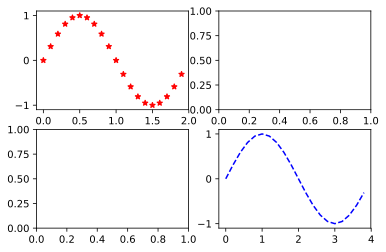

In [99]:
# 本节无关
# subplots
import numpy as np

t=np.arange(0.0,2.0,0.1)
print(t)
s=np.sin(t*np.pi)
figure,ax=plt.subplots(2,2)
print(type(ax))
print(type(figure))
ax[0][0].plot(t,s,'r*')
ax[1][1].plot(t*2,s,'b--')

In [102]:
# 本函数已保存在d2lzh包中方便以后使用
def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    # 这里的_表示我们忽略（不使用）的变量, plt.subplots 用来画子图， 1 行 10 列
    _, ax = plt.subplots(1, len(images), figsize=(12, 12))
    print(type(ax))
    for x, img, lbl in zip(ax, images, labels):
        # matplotlib.pyplot.imshow(): Display data as an image, i.e., on a 2D regular raster.
        # 先将 tensor 转化为 numpy 多维数组， 再 imshow 作为图像显示
        # Display data as an image
        x.imshow(img.view((28, 28)).numpy())
        x.set_title(lbl)
        # 展示横轴纵轴坐标单位
        x.axes.get_xaxis().set_visible(True)
        x.axes.get_yaxis().set_visible(True)
    # plt.show()

9
0
0
3
0
2
7
2
5
5
<class 'numpy.ndarray'>


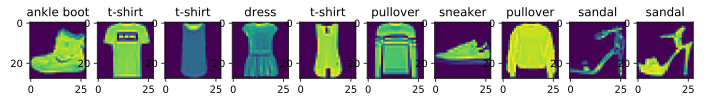

In [105]:
X, y = [], []
for i in range(10):
    X.append(mnist_train[i][0])
    y.append(mnist_train[i][1])
    print(mnist_train[i][1])
# 展示 10 张图
show_fashion_mnist(X, get_fashion_mnist_labels(y))

## 3.5.2 读取小批量

In [107]:
batch_size = 256
if sys.platform.startswith('win'):
    num_workers = 0  # 0表示不用额外的进程来加速读取数据
else:
    num_workers = 4
# 训练迭代器
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
# 测试迭代器
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [108]:
start = time.time()
for X, y in train_iter:
    continue
print('%.2f sec' % (time.time() - start))

1.66 sec
